In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
start_date = '2014-01-01'
end_date = '2024-03-31'
usd_yuan_ticker = 'USDCNY=X' # czy cnyusd?
oil_ticker = 'CL=F'
all_data = yf.download(tickers=[usd_yuan_ticker, oil_ticker], start=start_date, end=end_date)["Close"]
all_data = all_data.rename(columns={oil_ticker: "oil", usd_yuan_ticker: "currency"})

[*********************100%%**********************]  2 of 2 completed


In [3]:
all_data.loc[all_data.oil < 0, "oil"] = np.nan

In [4]:
all_data = all_data.dropna()

In [5]:
all_data = all_data.pct_change(fill_method=None)

In [6]:
all_data['month'] = pd.PeriodIndex(all_data.index, freq='M')

monthly = all_data.groupby(by = 'month').max()

In [7]:
fit_m = monthly[:'2020-01']

## Waluty

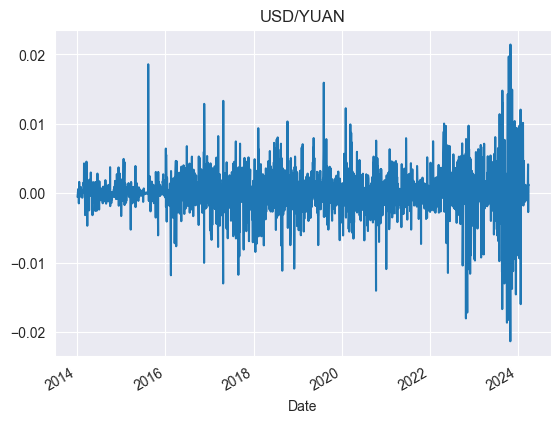

In [8]:
_ = all_data.currency.plot(title='USD/YUAN')

In [9]:
c, loc, scale = stats.genextreme.fit(fit_m["currency"])
print(f'c={c}, loc={loc}, scale={scale}')

c=-0.8311315659296995, loc=0.0031927296837110427, scale=0.0028665108362351593


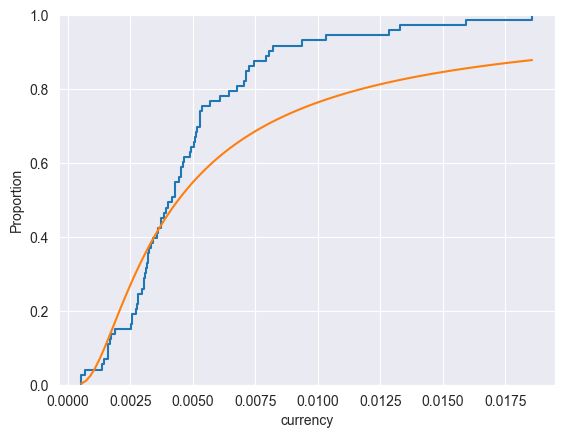

In [10]:
sns.ecdfplot(fit_m.currency)
t = np.linspace(min(fit_m.currency), max(fit_m.currency), 100)
_ = plt.plot(t, stats.genextreme.cdf(t, c, loc=loc, scale=scale))

### Backtesting

In [11]:
print(f'Dobrane parametry: c={c}, loc={loc}, scale={scale}')

Dobrane parametry: c=-0.8311315659296995, loc=0.0031927296837110427, scale=0.0028665108362351593


In [12]:
print(f"średnia={np.mean(monthly['2020-02':]['currency'])},\n"
      f"odchylenie standardowe = {np.std(monthly['2020-02':]['currency'])}")

średnia=0.006568668866519829,
odchylenie standardowe = 0.003836640333727664


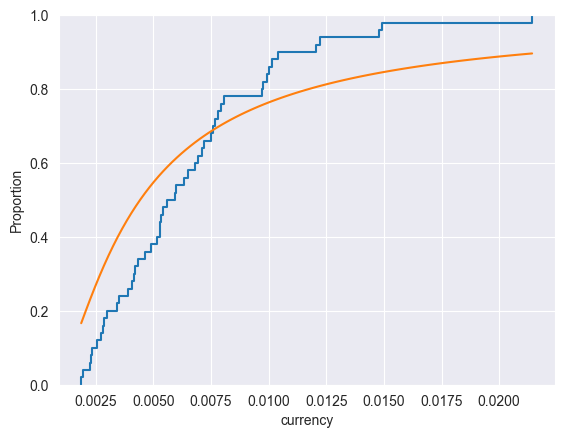

In [13]:
sns.ecdfplot(monthly['2020-02':].currency)
t = np.linspace(min(monthly['2020-02':].currency), max(monthly['2020-02':].currency), 100)
_ = plt.plot(t, stats.genextreme.cdf(t, c, loc=loc, scale=scale))

## Ropa

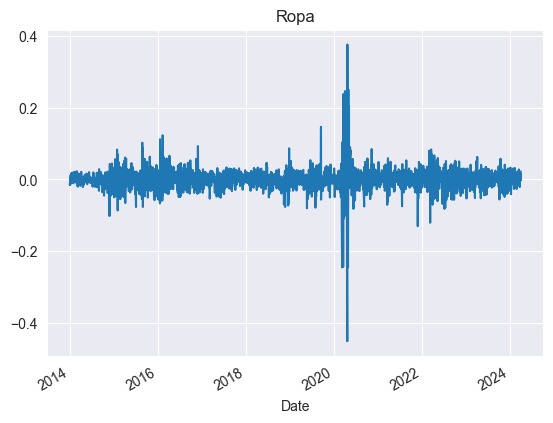

In [14]:
_ = all_data.oil.plot(title='Ropa')

In [15]:
all_data.sort_values(by="oil")

Ticker,oil,currency,month
Date,,,
2020-04-21,-0.452107,-0.000904,2020-04
2020-03-09,-0.245882,-0.000706,2020-03
2020-04-27,-0.245573,0.002222,2020-04
2020-03-18,-0.244156,0.001931,2020-03
2021-11-26,-0.130629,-0.000751,2021-11
...,...,...,...
2020-03-19,0.238095,0.005738,2020-03
2020-04-02,0.246677,0.002528,2020-04
2020-04-30,0.250996,-0.000382,2020-04


In [16]:
c, loc, scale = stats.genextreme.fit(fit_m.oil)
print(f'c={c}, loc={loc}, scale={scale}')

c=-0.42037422179219824, loc=0.02736316660552203, scale=0.011297621692126326


In [17]:
print(f"średnia={np.mean(monthly['2020-02':].oil)},\n"
      f"odchylenie standardowe = {np.std(monthly['2020-02':].oil)}")

średnia=0.05676353724639549,
odchylenie standardowe = 0.05930076130399018


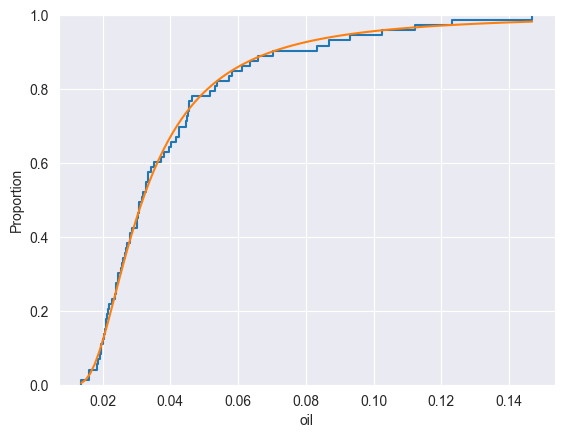

In [18]:
sns.ecdfplot(fit_m.oil)
t = np.linspace(min(fit_m.oil), max(fit_m.oil), 100)
_ = plt.plot(t, stats.genextreme.cdf(t, c, loc=loc, scale=scale))

### Backtesting

In [19]:
print(f'Dobrane paraemetry: c={c}, loc={loc}, scale={scale}')

Dobrane paraemetry: c=-0.42037422179219824, loc=0.02736316660552203, scale=0.011297621692126326


In [20]:
print(f"średnia={np.mean(monthly['2020-02':].oil)},\n"
      f"odchylenie standardowe = {np.std(monthly['2020-02':].oil)}")

średnia=0.05676353724639549,
odchylenie standardowe = 0.05930076130399018


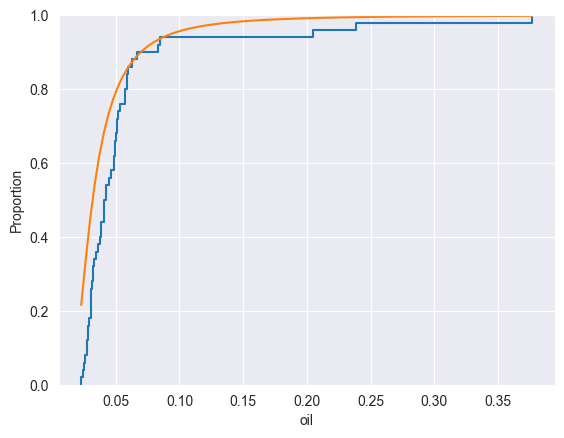

In [21]:
sns.ecdfplot(monthly['2020-02':].oil)
t = np.linspace(min(monthly['2020-02':].oil), max(monthly['2020-02':].oil), 100)
_ = plt.plot(t, stats.genextreme.cdf(t, c, loc=loc, scale=scale))